### Case Study - Analysing augo-mpg dataset using pandas, seaborn, plotly and dash

#### Auto MPG Dataset Overview
The **Auto MPG dataset** is a well-known dataset often used in machine learning and data analysis to explore regression tasks. It contains information about various car models from the late 1970s and early 1980s, including their fuel efficiency and other characteristics.

#### Key Features:
- **MPG (Miles Per Gallon)**: The target variable, representing the fuel efficiency of the car.
- **Cylinders**: Number of cylinders in the engine (e.g., 4, 6, 8).
- **Displacement**: Engine displacement in cubic inches.
- **Horsepower**: Engine horsepower.
- **Weight**: Vehicle weight in pounds.
- **Acceleration**: Time taken to accelerate from 0 to 60 mph (in seconds).
- **Model Year**: The model year of the car (e.g., 70 for 1970).
- **Origin**: Origin of the car (1: USA, 2: Europe, 3: Japan).
- **Car Name**: The name of the car model (string).

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
# os.chdir("./datasets")

plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'
plt.rcParams['xtick.color'] = 'darkslategrey'
plt.rcParams['ytick.color'] = 'darkslategrey'
plt.rcParams['legend.fontsize'] = 'x-small'  
plt.rcParams['legend.edgecolor'] = 'darkslategrey'

###### Ex. Read and clean data from auto-mpg,csv file

In [19]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,car name,origin,model year,mpg,cylinders,displacement,horsepower,weight,acceleration
0,chevrolet chevelle malibu,1,70,18.0,8,307.0,130,3504,12.0
1,buick skylark 320,1,70,15.0,8,350.0,165,3693,11.5
2,plymouth satellite,1,70,18.0,8,318.0,150,3436,11.0
3,amc rebel sst,1,70,16.0,8,304.0,150,3433,12.0
4,ford torino,1,70,17.0,8,302.0,140,3449,10.5


In [15]:
df.shape

(398, 9)

In [7]:
df.dtypes

car name         object
origin            int64
model year        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

###### Convert horsepower column to float

In [10]:
df.horsepower.str.isdigit().all()  # There is atelast 1 non-digit value in the column

np.False_

In [14]:
df.horsepower[~ df.horsepower.str.isdigit()]

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

###### Replace `?` in horsepower column to 0 

In [18]:
df.horsepower.replace({"?" : "0"})

###### Drop rows where horsepower id `?`

In [24]:
df = df.loc[df.horsepower.str.isdigit(), :]
df.horsepower = df.horsepower.astype(int)

In [26]:
df.dtypes

car name         object
origin            int64
model year        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
dtype: object

###### Ex. Replace values in Origin column to country names

In [28]:
df.origin.unique()

array([1, 3, 2])

In [33]:
origins = {1 : "USA", 2 : "Germany", 3 : "Japan"}
df.origin.replace(origins, inplace=True)

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
# os.chdir("./datasets")

plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'
plt.rcParams['xtick.color'] = 'darkslategrey'
plt.rcParams['ytick.color'] = 'darkslategrey'
plt.rcParams['legend.fontsize'] = 'x-small'  
plt.rcParams['legend.edgecolor'] = 'darkslategrey'

df = pd.read_csv("auto-mpg.csv")
df[df.horsepower.str.isdigit()]
df = df.loc[df.horsepower.str.isdigit(), :]
df.horsepower = df.horsepower.astype(int)

origins = {1 : "USA", 2 : "Germany", 3 : "Japan"}
df.replace({"origin" : origins}, inplace=True)

df.head()

,car name,origin,model year,mpg,cylinders,displacement,horsepower,weight,acceleration
0,chevrolet chevelle malibu,USA,70,18.0,8,307.0,130,3504,12.0
1,buick skylark 320,USA,70,15.0,8,350.0,165,3693,11.5
2,plymouth satellite,USA,70,18.0,8,318.0,150,3436,11.0
3,amc rebel sst,USA,70,16.0,8,304.0,150,3433,12.0
4,ford torino,USA,70,17.0,8,302.0,140,3449,10.5


###### Ex. Analyze the relationship between MPG and other variables.

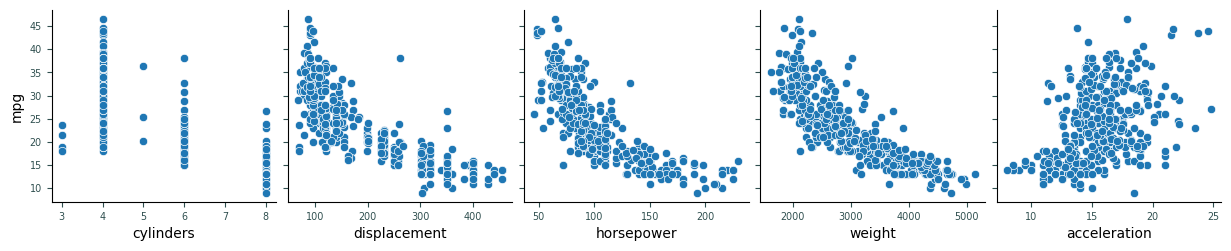

In [39]:
sns.pairplot(data = df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars= "mpg")

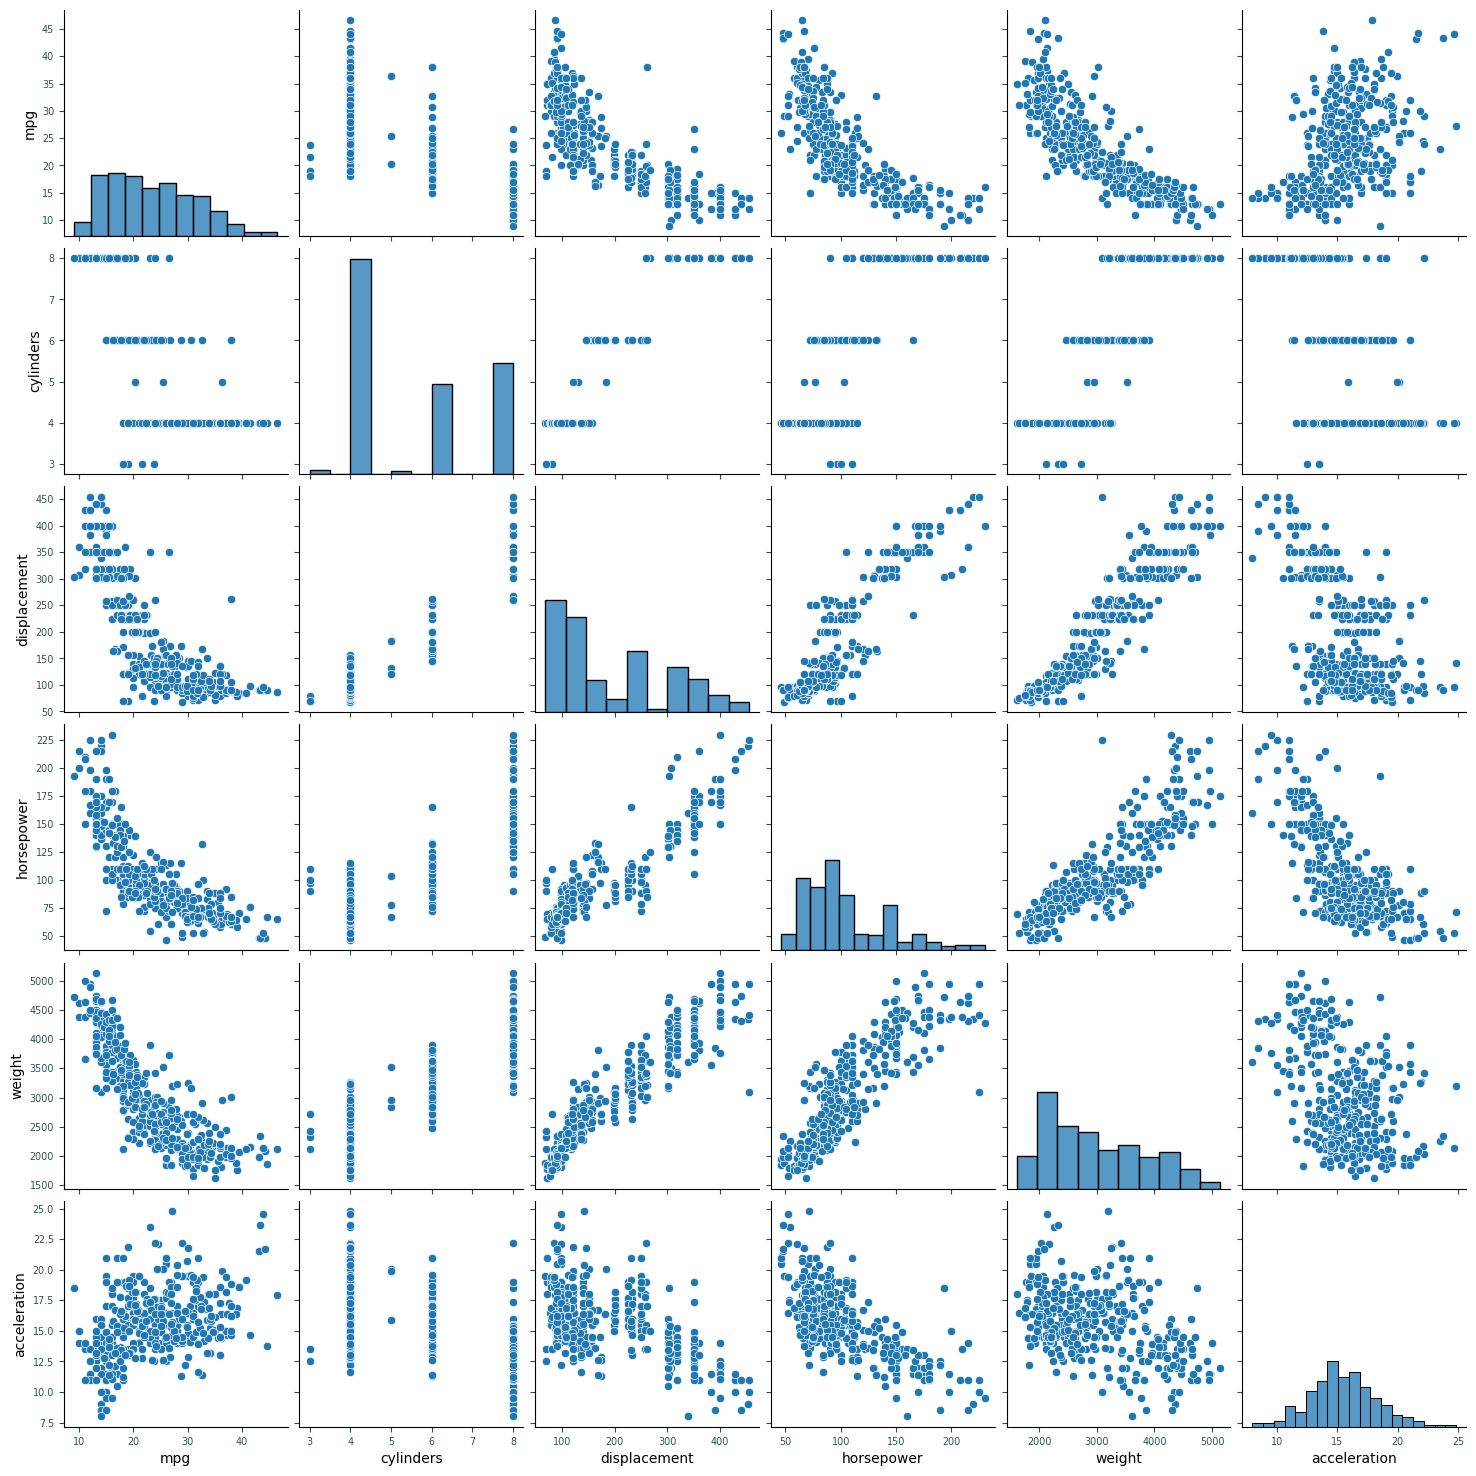

In [40]:
sns.pairplot(data = df, vars=['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])

In [45]:
corr_matrix = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', "mpg"]].corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


<Axes: >

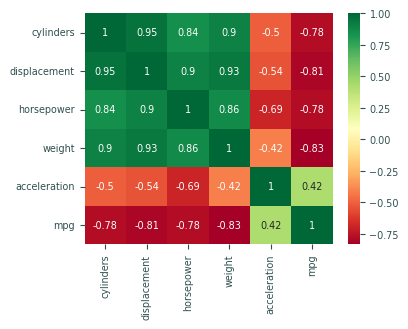

In [53]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size" : "x-small"},  cmap="RdYlGn")

## Create interactive visualizations using Plotly.

### Introduction to Plotly.

**Plotly** is a popular open-source library for creating interactive, publication-quality graphs and charts in Python, R, and JavaScript. It's particularly known for its versatility and ease of use in producing a wide range of visualizations, from basic charts to complex dashboards.

#### Key Features:
- **Interactive Plots**: Plotly provides interactive features like zoom, pan, hover tooltips, and automatic updating.
- **Wide Range of Charts**: Includes support for line plots, scatter plots, bar charts, histograms, heatmaps, 3D plots, and more.
- **Publication-Quality**: Generates high-quality visuals suitable for publication and presentations.
- **Integrations**: Works seamlessly with popular data science tools like Jupyter Notebooks, Dash (for building web applications), and others.
- **Customization**: Offers extensive customization options for every aspect of the chart, including colors, labels, and annotations.

#### Installation:
To install Plotly, you can use pip:
`pip install plotly`


- **Documentation**: [Plotly Official Documentation](https://plotly.com/python/)

### Creating basic interactive plots (line, bar, scatter, pie).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
# os.chdir("./datasets")

plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'
plt.rcParams['xtick.color'] = 'darkslategrey'
plt.rcParams['ytick.color'] = 'darkslategrey'
plt.rcParams['legend.fontsize'] = 'x-small'  
plt.rcParams['legend.edgecolor'] = 'darkslategrey'

df = pd.read_csv("auto-mpg.csv")
df[df.horsepower.str.isdigit()]
df = df.loc[df.horsepower.str.isdigit(), :]
df.horsepower = df.horsepower.astype(int)

origins = {1 : "USA", 2 : "Germany", 3 : "Japan"}
df.replace({"origin" : origins}, inplace=True)

df.head()